# ENGLISH 31AC Literature of American Cultures
**Instructor: Amy Lee**

**Developers: Michaela Palmer, Yoonhee Choice**

**FPF 2017**

Welcome to lab! Please read this lab in its entirety, as the analysis will make a lot more sense with the background context provided.
This lab is intended to be a hands-on introduction to data science as it can be applied to Chinatown demographics and analyzing primary texts.

The goal is to understand the evolution of Chinatowns due to outside forces such as globalization, immigration, and urbanization.

## What this lab will cover
* Running Jupyter Notebooks
* Data Analysis of Chinatowns' demographics
* Visualization & Interpretation

## What you need to do
* Read the content, complete the questions
* Analyze the data
* Submit the assignment


# 1. Running Jupyter Notebooks

You are currently working in a Jupyter Notebook. A Notebook allows text and code to be combined into one document. Each rectangular section of a notebook is called a "cell." There are two types of cells in this notebook: text cells and code cells. 

Jupyter allows you to run simulations and regressions in real time. To do this, select a code cell, and click the "run cell" button at the top that looks like ▶| to confirm any changes. Alternatively, you can hold down the `shift` key and then press `return` or `enter`.

In the following simulations, anytime you see `In [ ]` you should click the "run cell" button to see output. **If you get an error message after running a cell, go back to the beginning of the lab and make sure that every previous code cell has been run.**

## 1.1 Importing Modules

First we need to import some modules so that we can call the functions from within. We are going to use these functions to manipulate data tables and conduct math operations. Run the code cell below to import these modules.

In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline
import spacy
from wordcloud import WordCloud

## 1.2 Reading Data

[INITIAL MAPS] BOSTON & SF CHINATOWN data 

In [1]:
1+1

2

TABLE METHODS/exploration

Calculate percentage change:

# 2. Analyzing Demographics
In this section, we will examine some of the factors that influence population growth and how they are changing the landscape of Chinatowns across the U.S.

# 3. Reading Primary Texts


We're going to analyze some of the poems written by Chinese immigrants. Run the following cell to import the poems from a .txt file.

In [3]:
with open('data/islandpoetry1_22.txt', "r") as f:
    raw = f.read()
raw

'The sea-scape resembles lichen twisting and\nturning for a thousand li}\nThere is no shore to land and it is difficult to\nwalk.\nWith a gentle breeze I arrived at the city\nthinking all would be so.\nAt ease, how was one to know he was to live in a\nwooden building?\n\nBecause my house had bare walls, I began\nrushing all about.\nThe waves are happy, laughing "Ha-ha!"\nWhen I arrived on Island, I heard I was\nforbidden to land.\nI could do nothing but frown and feel angry\nat heaven.\n\nAs a rule, a person is twenty before he starts\nmaking a living.\nFamily circumstances have forced me to\nexperience wind and dust.\nThe heartless months and years seem bent on\ndefeating me.\nIt is a pity that time quickly ages one.\n\nThe gold and silver of America is very\nappealing.\nJabbing an awl into the thigh in search of\nglory,\nI embarked on the journey.\nNot only are my one-thousand pieces of gold\nalready depleted, but\nMy countenance is blackened. It is surely for\nthe sake of the family

We're interested in which words appear the most often in our set of poems. It's pretty hard to read or see much in this form. We'll coming back to the topic of what words are the most common with actual numbers a bit later but for now, run the following cell to generate two cool visualizations of the most common words (minus those such as "the", "a", etc.).

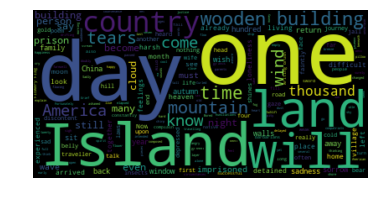

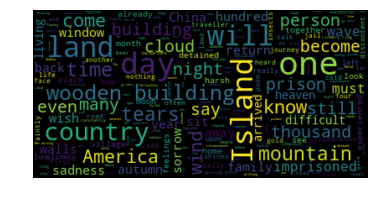

In [4]:
wordcloud = WordCloud().generate(raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Oops, it seems we've forgotten just how many poems we have in our set. Luckily we have a quick way of finding out! Each "\n" in the display of the poem text indicates a line break. It turns out that each poem is separated by an empty line, a.k.a. two line breaks or "\n"'s.

In [7]:
num_poems = len(raw.split("\n\n"))
num_poems

49

We can also use this idea to calculate the number of characters in each poem.

In [17]:
num_char_per_poem = [len(p) for p in raw.split("\n\n")]
print(num_char_per_poem)

[260, 212, 227, 262, 306, 233, 654, 260, 488, 550, 206, 167, 331, 325, 128, 203, 196, 251, 221, 250, 488, 201, 206, 237, 344, 243, 442, 345, 507, 474, 382, 465, 624, 445, 302, 399, 230, 505, 268, 437, 287, 226, 532, 116, 487, 254, 279, 263, 233]


This is interesting but seems like just a long list of numbers. What about the average number of characters per poem?

In [18]:
avg_char = np.mean(num_char_per_poem)
avg_char

325.53061224489795

We can also use "\n" to look at enjambment. Let's calculate the proportion of lines that are enjambed out of the total number of lines per poem. 

In [19]:
from string import punctuation

poems = raw.split("\n\n")

all_poems_enjambment = []
for p in poems:
    lines = p.split("\n")
    enjambment = 0
    for l in lines:
        try:
            if l[-1] in punctuation:
                pass
            else:
                enjambment += 1
        except:
            pass
    enj = enjambment/len(lines)
    all_poems_enjambment.append(enj)

print(all_poems_enjambment)

[0.5, 0.42857142857142855, 0.42857142857142855, 0.5555555555555556, 0.1111111111111111, 0.5, 0.45, 0.5, 0.4666666666666667, 0.4375, 0.42857142857142855, 0.2, 0.25, 0.2222222222222222, 0.0, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.2857142857142857, 0.4, 0.42857142857142855, 0.42857142857142855, 0.5, 0.2, 0.4444444444444444, 0.42857142857142855, 0.2727272727272727, 0.5, 0.35714285714285715, 0.3333333333333333, 0.5, 0.3157894736842105, 0.35714285714285715, 0.5, 0.5384615384615384, 0.5, 0.5, 0.375, 0.4666666666666667, 0.5555555555555556, 0.5, 0.47058823529411764, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4444444444444444]


Once again, what about the average?

In [21]:
np.mean(all_poems_enjambment)

0.40982643044072875

Let's now return to the question of the words that appear the most frequently in these 49 poems. First we have to use spaCy, an open-source software library for Natural Language Processing (NLP), to parse through the text and replace all the "\n"'s with spaces.

In [24]:
nlp = spacy.load('en', parser=False)
parsed_text = nlp(raw.replace("\n", " "))
parsed_text



    Only loading the 'en' tokenizer.



The sea-scape resembles lichen twisting and turning for a thousand li} There is no shore to land and it is difficult to walk. With a gentle breeze I arrived at the city thinking all would be so. At ease, how was one to know he was to live in a wooden building?  Because my house had bare walls, I began rushing all about. The waves are happy, laughing "Ha-ha!" When I arrived on Island, I heard I was forbidden to land. I could do nothing but frown and feel angry at heaven.  As a rule, a person is twenty before he starts making a living. Family circumstances have forced me to experience wind and dust. The heartless months and years seem bent on defeating me. It is a pity that time quickly ages one.  The gold and silver of America is very appealing. Jabbing an awl into the thigh in search of glory, I embarked on the journey. Not only are my one-thousand pieces of gold already depleted, but My countenance is blackened. It is surely for the sake of the family.  Four days before the Qiqiao Fes